<a href="https://colab.research.google.com/github/AZVR3/tuberculosis-tensorflow/blob/main/GPU_tuberculosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azure33","key":"b0e76c5f6657dc66a5a3b13d3cf726d5"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!unzip tuberculosis-tb-chest-xray-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 99% 655M/663M [00:11<00:00, 117MB/s] 
100% 663M/663M [00:11<00:00, 62.2MB/s]
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflat

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
# Define image dimensions (resize for consistency)
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Paths to datasets
no_tb_data = "/content/TB_Chest_Radiography_Database/Normal"
tb_data = "/content/TB_Chest_Radiography_Database/Tuberculosis"

In [ ]:
# Function to load and preprocess images
def load_images_and_labels(path, label):
    images = []
    labels = []
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        if os.path.isfile(file_path):
            # Load image and preprocess (resize and normalize)
            img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)  # Load in grayscale
            img = cv.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            img = img / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)
    return images, labels

# Load Normal and Tuberculosis images
normal_images, normal_labels = load_images_and_labels(no_tb_data, 0)
tb_images, tb_labels = load_images_and_labels(tb_data, 1)

# Combine data and labels
images = np.array(normal_images + tb_images)
labels = np.array(normal_labels + tb_labels)

# Split into training and testing datasets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Ensure data shape matches input requirements for TensorFlow
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension
test_images = np.expand_dims(test_images, axis=-1)

print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (3360, 128, 128, 1)
Testing data shape: (840, 128, 128, 1)


In [ ]:
# Build a basic CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8436 - loss: 0.3623 - val_accuracy: 0.9345 - val_loss: 0.1429
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9569 - loss: 0.1218 - val_accuracy: 0.9655 - val_loss: 0.0952
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9654 - loss: 0.0899 - val_accuracy: 0.9619 - val_loss: 0.0891
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9732 - loss: 0.0727 - val_accuracy: 0.9738 - val_loss: 0.0746
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9820 - loss: 0.0517 - val_accuracy: 0.9810 - val_loss: 0.0602
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9912 - loss: 0.0251 - val_accuracy: 0.9798 - val_loss: 0.0674
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9848 - loss: 0.0392 - val_accuracy: 0.9702 - val_loss: 0.0747
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9867 - loss: 0.0374 - val_acc

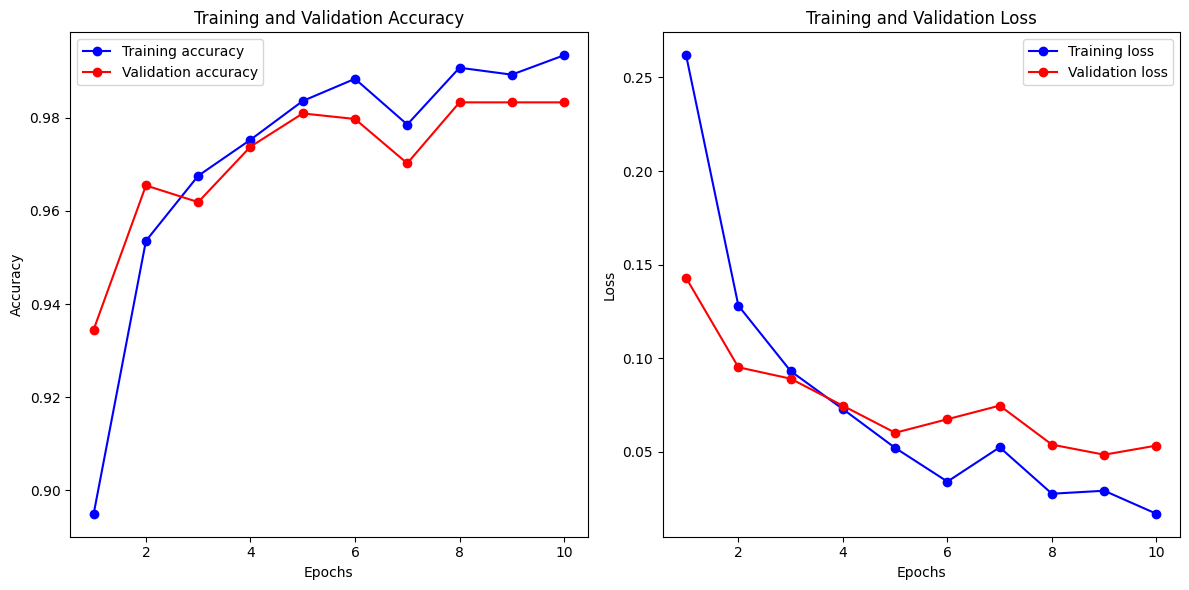

In [ ]:
# Visualize accuracy and loss over epochs
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)